In [26]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [18]:
display(train.head(5))
print(train.shape)
print(train.columns.values)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Davidson, Mr. Thornton",male,1601,G6,S
freq,1,577,7,4,644


In [21]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
print('Wielkość zestawu danych przed usunięciem: {}'.format(train.shape))

train.drop(columns=['Ticket', 'Cabin'], inplace=True)
test.drop(columns=['Ticket', 'Cabin'], inplace=True)

print('Wielkość zestawu danych po usunięciu: {}'.format(train.shape))

Wielkość zestawu danych przed usunięciem: (891, 12)
Wielkość zestawu danych po usunięciu: (891, 10)


In [34]:
train['Name'].head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [35]:
train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [37]:
train['title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [38]:
train['title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Lady          1
Jonkheer      1
Capt          1
Countess      1
Mme           1
Sir           1
Don           1
Ms            1
Name: title, dtype: int64

In [39]:
for dataset in [train, test]:
    dataset['title'] = dataset['title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['title'] = dataset['title'].replace('Mlle', 'Miss')
    dataset['title'] = dataset['title'].replace('Ms', 'Miss')
    dataset['title'] = dataset['title'].replace('Mme', 'Mrs')

In [40]:
train[['title', 'Survived']].groupby(['title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Other,0.347826
2,Mr,0.156673


In [48]:
for dataset in [train, test]:
    dataset['title'] = dataset['title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}).fillna(0)
    
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,3,male,22.0,1,0,7.2500,S,0.0
1,1,1,female,38.0,1,0,71.2833,C,0.0
2,1,3,female,26.0,0,0,7.9250,S,0.0
3,1,1,female,35.0,1,0,53.1000,S,0.0
4,0,3,male,35.0,0,0,8.0500,S,0.0


In [50]:
print('Wielkość zestawu danych przed usunięciem: {}'.format(train.shape))

for dataset in [train, test]:
    dataset.drop(columns=['Name', 'PassengerId'], inplace=True)
    
print('Wielkość zestawu danych po usunięciu: {}'.format(train.shape))

Wielkość zestawu danych przed usunięciem: (891, 9)


KeyError: "['Name' 'PassengerId'] not found in axis"

In [46]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,3,male,22.0,1,0,7.2500,S,1.0
1,1,1,female,38.0,1,0,71.2833,C,3.0
2,1,3,female,26.0,0,0,7.9250,S,2.0
3,1,1,female,35.0,1,0,53.1000,S,3.0
4,0,3,male,35.0,0,0,8.0500,S,1.0


In [51]:
for dataset in [train, test]:
    dataset['Sex'] = dataset['Sex'].map({'male': 1, 'female': 0})

In [52]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,3,1,22.0,1,0,7.2500,S,0.0
1,1,1,0,38.0,1,0,71.2833,C,0.0
2,1,3,0,26.0,0,0,7.9250,S,0.0
3,1,1,0,35.0,1,0,53.1000,S,0.0
4,0,3,1,35.0,0,0,8.0500,S,0.0


In [53]:
np.sum(train['Age'].isnull())

177

In [54]:
for dataset in [train, test]:
    dataset['Age'] =  dataset['Age'].fillna(np.median(dataset['Age'].median()))

In [55]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,3,1,22.0,1,0,7.2500,S,0.0
1,1,1,0,38.0,1,0,71.2833,C,0.0
2,1,3,0,26.0,0,0,7.9250,S,0.0
3,1,1,0,35.0,1,0,53.1000,S,0.0
4,0,3,1,35.0,0,0,8.0500,S,0.0


In [56]:
np.sum(train['Age'].isnull())

0

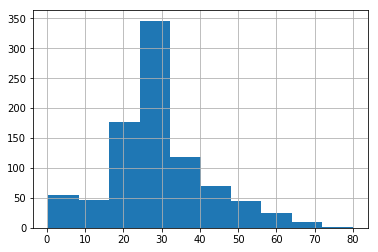

In [57]:
train['Age'].hist()

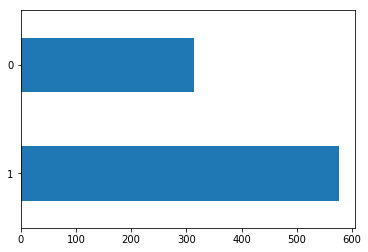

In [69]:
train['Sex'].value_counts().plot(kind='barh')

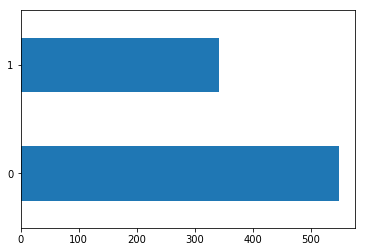

In [70]:
train['Survived'].value_counts().plot(kind='barh')

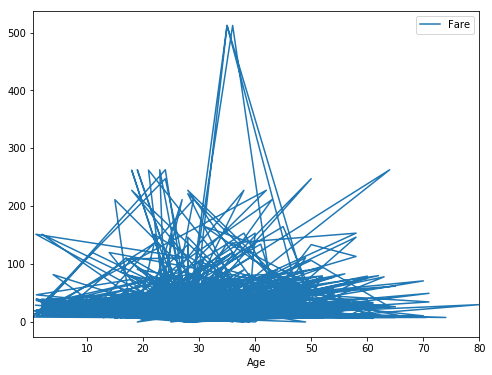

In [58]:
train.plot.line(x='Age', y='Fare', figsize=(8,6))

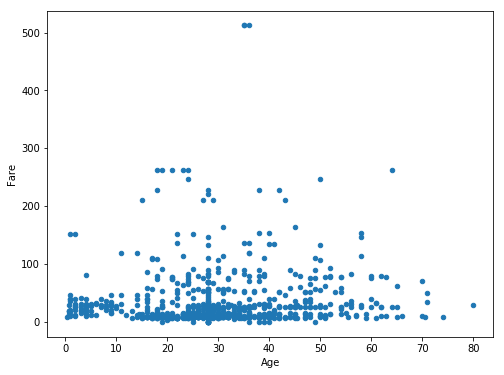

In [60]:
train.plot.scatter(x='Age', y='Fare', figsize=(8,6))

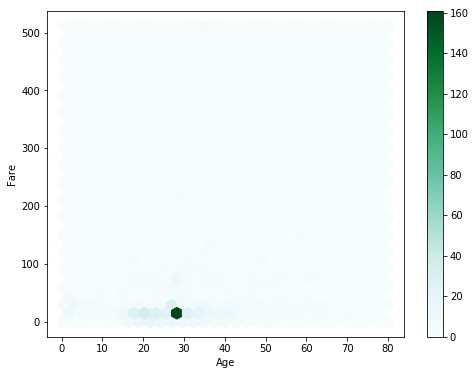

In [72]:
train.plot.hexbin(x='Age', y='Fare', gridsize=30, figsize=(8,6))

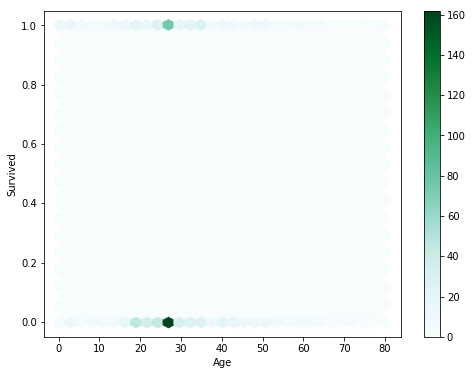

In [73]:
train.plot.hexbin(x='Age', y='Survived', gridsize=30, figsize=(8,6))

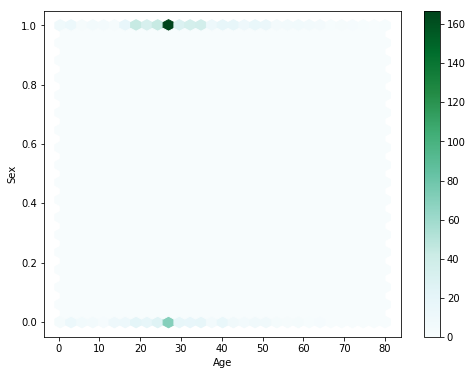

In [74]:
train.plot.hexbin(x='Age', y='Sex', gridsize=30, figsize=(8,6))